ICI : T_id est le pas (temps)

Les actions sont : 'rating', 'food_rating' et 'service_rating'

Vous pouvez utiliser le format que vous préférez : 
- DataFrame de pandas (df_data) 
- un tableau numpy (np_data), alors vous allez faire : my_data = np_data
- un dictionnaire (in_data), vous allez faire : my_data = in_data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# DataFrame
df_data_initial = pd.read_csv("rating_final_user.csv")
df_data = df_data_initial.loc[:, ["T_ID", "rating", "food_rating", "service_rating"]]

# Dictionnaire
in_data = df_data_initial.to_dict()

# Tableau numpy
np_data = df_data_initial.loc[:, ["T_ID", "rating", "food_rating", "service_rating"]].to_numpy()

In [2]:
# 
df_data.head(5)

,T_ID,rating,food_rating,service_rating
0,1,1,1,2
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


In [3]:
print(np_data)

[[   1    1    1    2]
 [   2    1    1    1]
 [   3    1    1    1]
 ...
 [1159    2    2    2]
 [1160    2    2    1]
 [1161    1    2    1]]


In [4]:
print(in_data)

{'T_ID': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 119: 120, 120: 121

<h3>Faire UCB avec initialisation à zéro. </h3>

# Explication reinforcement

## 1. Exam UCB

Pour poser le problème nous avons 3 bras : "rating", "food_rating", "service_rating".

Nous savons qu'une bonne note pour un bras est 2, la moins bonne est 0. Nous ne pouvons donc ici distinguer ou discriminer un service ou la nourriture proposée donc nous n'avons pas besoin de méthode d'exploration basé sur l'aléatoire mais basé sur la réponse donnée pour un bras contenu dans notre jeu de donnée. C'est ainsi que nous pourrons attribué la récompense à chaque pas.

### TODO Enzo
L'algorithme UCB suppose donc qu'ils ont tous la même valeur moyenne observée. Ensuite, l'algorithme crée une limite de confiance pour chacune des données évalués. Il choisit donc la note égale à la précédente pour chaque action possible.

Ensuite, deux choses peuvent se produire : on note la nourriture ou ... puis donne une récompense qui corresond forcément à une note attribuée dans notre jeu de donnée. 

Plus il y a d'avis plus la moyenne observée augmentera et la limite de confiance augmentera également. La fiabilité de nos test ne peut pas diminuer en sachant que l'on a une note à chaque fois.
En exploitant le meilleur échantillon, nous diminuons la limite de confiance. Au fur et à mesure que nous ajoutons de plus en plus d'échantillons, la probabilité que d'autres bras obtiennent de bons résultats augmente également.

## L'algorithme

In [5]:
# pour chaque pas :
def ucb(my_data, c: int) -> tuple[dict, dict]:
    out_reward = {"rating":[], "food_rating":[], "service_rating":[]}
    Qta = {"rating":[], "food_rating":[], "service_rating":[]}
    out_UCB_reward = {"rating":0, "food_rating":0, "service_rating":0}

    for i in range(my_data.shape[0]):
            
        # pour chaque action:
        for action in Qta.keys():

            current_num_action_selected = list(Qta.keys()).index(action)
            # On rajoute la recompense à la liste des recompenses correspondante dans out_reward :
            reward = my_data.loc[i, action]
            # On calcule Qt(a) pour cette action, selon la règle de la mise à jour incrémentale
            N = len(Qta[action]) # nombre de fois que l'action a été prise
            
            if N == 0: 
                # cas particulier du premier élément :
                #la valeur de l'action est égale à la recompense courrante
                QTA = reward
            else:
                QTA_precedent = Qta[action][-1]
                QTA = QTA_precedent + (1/N) * (reward - QTA_precedent)

            # Ensuite on la met dans Qta
            Qta[action].append(QTA)
            
            # 3 bras à calculer pour chaque action
            N_a = np.zeros(len(Qta.keys()), dtype=int)
            
            # on recupere la recompense
            ucb = np.argmax(QTA + c * np.sqrt(math.log(i + 1) / len(my_data)))

            # On calcule, pour chaque action de out_reward, le UCB, selon la formule du cours 1
            # On le rajoute en out_UCB_reward
            out_UCB_reward[action] = ucb

    return Qta, out_UCB_reward



## Fonction d'affichage

In [6]:
# On affiche out_UCB_reward avec matplotlib

def print_Ucb(df_data, out_UCB_reward, Qta):

    nombre_pas = df_data.shape[0] # nombre d'élements dans le DataFrame = nombre steps
    x = range(df_data.shape[0])

    # pour chaque clé k dans Q
    plt.title("Valeurs de l'action à chaque moment T")
    for action in Qta.keys():
        plt.plot(x,  Qta[action])

    plt.show()    

    plt.title("Valeurs de l'action pour toutes les actions")
    plt.hist(out_UCB_reward)

In [7]:
my_data = df_data.copy()
Qta, out_UCB_reward = ucb(my_data, 0)

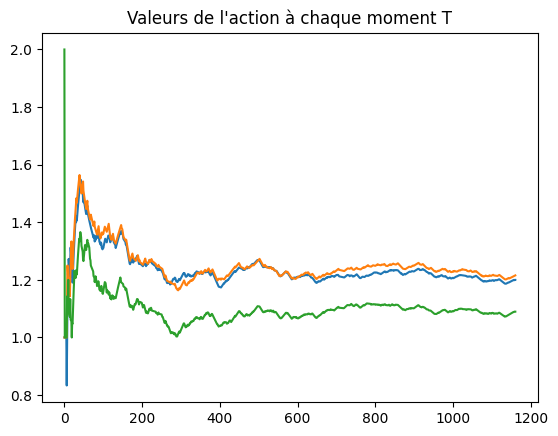

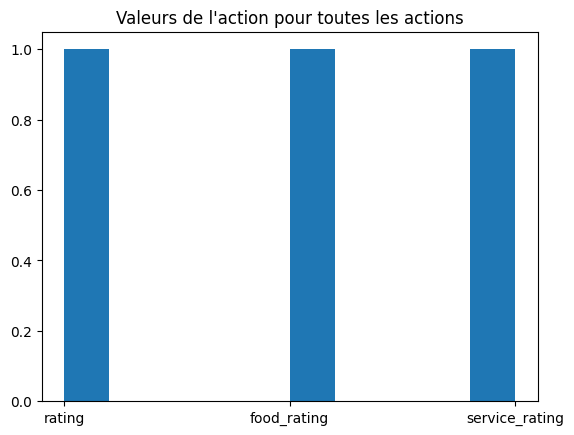

In [8]:
# Test avec comme coefficient 3
print_Ucb(my_data, out_UCB_reward, Qta)

<h3>Faire UCB avec initialisation à 5. </h3>

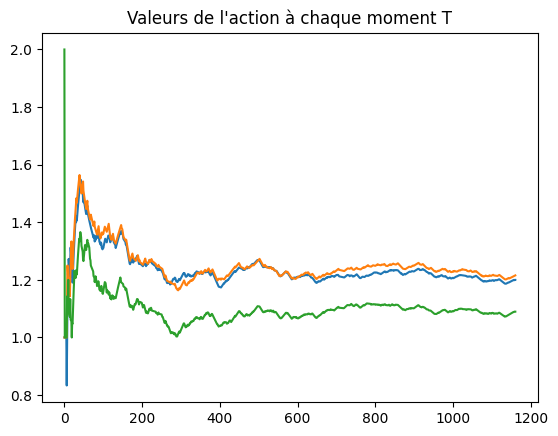

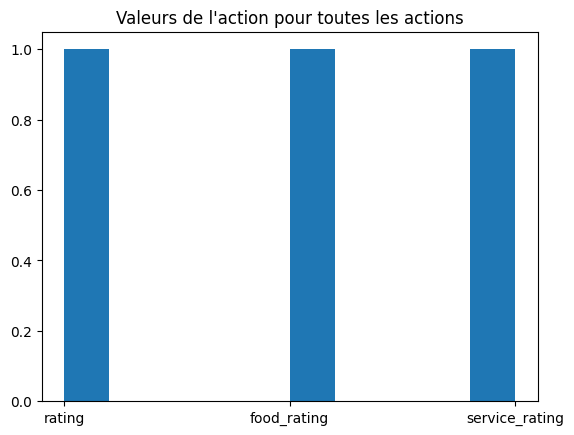

In [9]:
my_data = df_data.copy()
Qta5, out_UCB_reward5 = ucb(my_data, 5)
print_Ucb(my_data, out_UCB_reward5, Qta5)

On en déduit que peut importe le coefficient sachant que les données sont connues à l'avance l'apprentissage est le même.